In [21]:
import pandas as pd

import os

# Get the current working directory
cwd = os.getcwd()


# Change path to desired directory
os.chdir('C:/Users/302872/Desktop/py test/')

# Print the current working directory
print("Current working directory:", cwd)



Current working directory: c:\Users\302872\Desktop


In [27]:

df = pd.read_csv('Xcel Energy - Traffic Summary_Page 1_Time series.csv', parse_dates=['Date']); df.head()

,Date,Sessions
0,2022-01-01,207
1,2022-01-02,224
2,2022-01-03,330
3,2022-01-04,341
4,2022-01-05,410


In [28]:
df.dtypes

Date        datetime64[ns]
Sessions             int64
dtype: object

## Time Series Model

In [29]:
# set date col as index
df.set_index('Date', inplace=True)

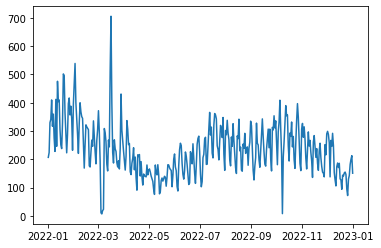

In [32]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

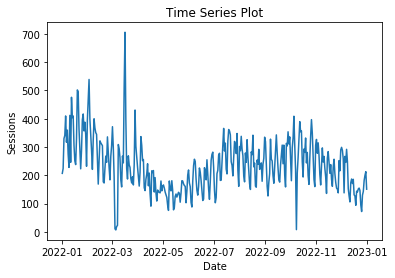

In [33]:
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Sessions')
plt.title('Time Series Plot')
plt.show()

In [34]:
# fit ARIMA model 
model = sm.tsa.ARIMA(df, order=(1,1,1)).fit()

#print summery
print(model.summary())

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:             D.Sessions   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2034.297
Method:                       css-mle   S.D. of innovations             64.604
Date:                Fri, 17 Mar 2023   AIC                           4076.593
Time:                        16:54:32   BIC                           4092.182
Sample:                    01-02-2022   HQIC                          4082.789
                         - 12-31-2022                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4324      0.447     -0.967      0.334      -1.309       0.444
ar.L1.D.Sessions     0.5562      0.051     10.987      0.000       0.457       0.655
ma.L1.D.Sessions    -0.9440 

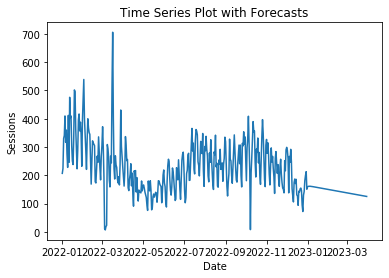

In [39]:
forecast = model.forecast(steps=90)[0] #1 month forecast
forecast_df = pd.DataFrame({'Sessions':forecast},
index=pd.date_range(start=df.index[-1], periods=90, freq='D'))

#print forecasted values
merged = pd.concat([df, forecast_df])

#create time series plot of merged data
plt.plot(merged)
plt.xlabel('Date')
plt.ylabel('Sessions')
plt.title('Time Series Plot with Forecasts')

# display
plt.show()